<a href="https://colab.research.google.com/github/JAVegaG/MCT_AI/blob/main/Project_2/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

The binary logistic model is a statistical model that helps estimate the probability of an outcome being true given two possible options. Therefore, it is usually used on simple classification tasks. The goal of this project is to explain how the binary logistic model works through the math behind it, and its Python implementation. For the mathematical part of it, vector notation will be used since it would later enable faster computation time.

## Math

In this project, the logistic model will be seen as if it would be implemented on a neural network to simplify the description of its functioning when used for addressing a classification task. Hence, to understand it, it's necessary to interiorize and keep in mind the following equations:

* First, the dot product of the input vector (X) and the weights of the neuron (W) is performed, and the result is added to the neuron's bias (b): 

\begin{equation}
z = \vec{W} \cdot \vec{X} + b
\end{equation}

* Then, the Sigmoid function is used as the activation function (σ) of the neuron. The result of this function would be a value between 1 and 0 corresponding to one of the two classes:

\begin{equation}
\sigma(z) = \hat{y}(z) = 
\begin{cases}
\frac{1}{1 + exp(z)}, & \text{if } z\geq 0
\\
\frac{exp(z)}{1 + exp(z)}, & \text{otherwise}
\end{cases}
\end{equation}

* Next, an optimization algorithm is used to adjust the parameters of the model, which would give better results in the classification. In this example, the gradient descent is the algorithm used as shown below, where θ is the parameter to optimize (weights or bias), η is the learning rate, ∇ is the gradient itself, y is the actual value, and L is the loss function:

\begin{equation}
\theta_{t+1} = \theta_{t} - \eta\nabla{L(f(x;\theta),y)}
\end{equation}

* Later, the binary cross entropy loss function is used to determine how exact is the prediction of the model comparing it to the real value:

\begin{equation}
L_{CE} = -\frac{1}{m}\sum_{i=1}^{m}{y_i\log{(\hat{y}_i)}}+(1-y_i)\log{(1-\hat{y}_i)}
\end{equation}

* Finally, the partial derivatives of the loss function with respect to the parameters:

\begin{equation}
\frac{\partial L_{CE}(\hat{y},y)}{\partial \vec{W}}
=
\frac{1}{m}(\hat{y}-y)\vec{X}^T_i
\qquad
\frac{\partial L_{CE}(\hat{y},y)}{\partial \vec{b}}
=
\frac{1}{m}(\hat{y}-y)
\end{equation}

## Python Code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/JAVegaG/MCT_AI.git

fatal: destination path 'MCT_AI' already exists and is not an empty directory.


In [ ]:
from MCT_AI.Project_2 import handler
from MCT_AI.Project_2 import logistic_regression as lr

First, it is necessary to identify the datasets that would be a good fit for a binary logistic regression model. Therefore, to find an adequate dataset one must search for those with a **classification task** and **only two targets**.

OpenML was used for that purpose.

Once found the desired dataset, it is loaded as shown next:

```
from sklearn.datasets import fetch_openml
```

Then, the data of the dataset is converted to a pandas data frame and the target to a pandas series. Next, for simplicity, all non-numerical columns are dropped.

In [ ]:
dataset = fetch_openml(name='phoneme', version=1)

x, y = handler.dset_2_dframe( dataset )

x, y = handler.remove_Categories( x, y )

Target 1: 1 , Target 2: 2
Are now 0 and 1 respectively


In [ ]:
x.head()

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127


Now, for a better understanding of the data, we use a pairplot to check how the data is distributed using the different characteristics compared to one another.

<Figure size 432x288 with 0 Axes>

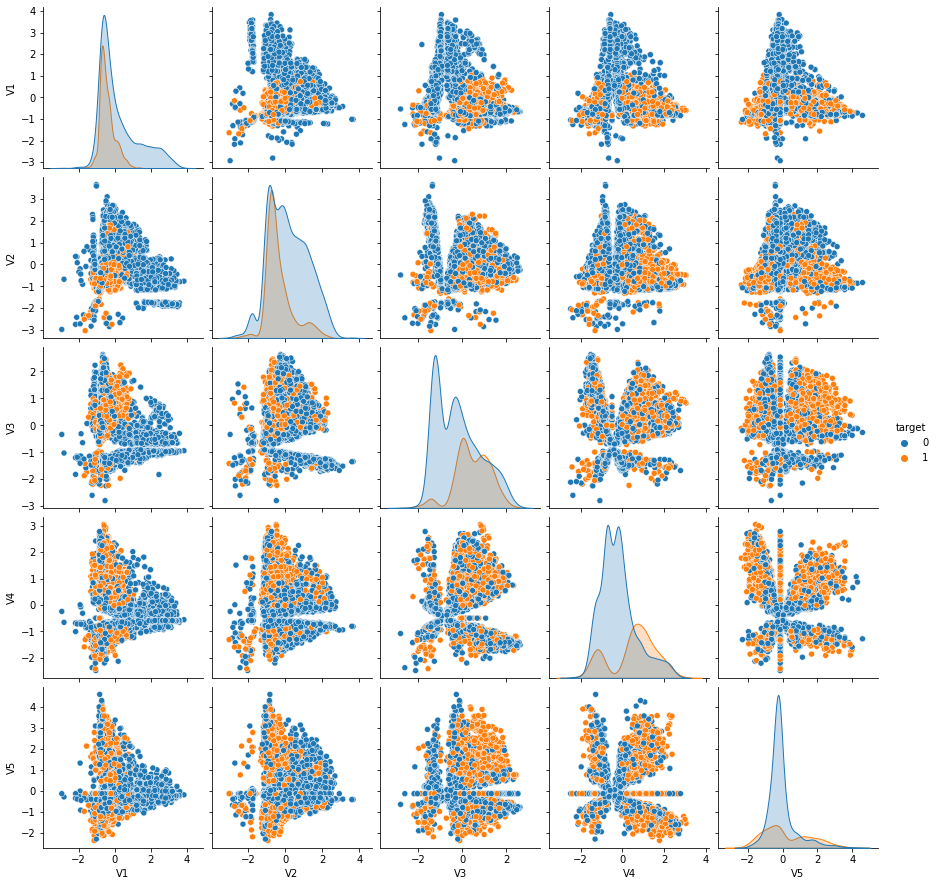

In [ ]:
z = x.copy()
z['target']=y

plt.figure()
sns.pairplot(z, hue="target")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

For a better performance comparison between the optimizers, it was also implemented the "Stochastic Gradient Descent with Momentum" and the "AdaGrad".

* The first one provides 2 advantages over the Stochastic Gradient Descent:

  * Faster convergence
  * Less oscillatory training

  Its equations are:
  * 
  \begin{equation}
  \Delta\theta_{t+1} = \alpha\Delta\theta_{t} - \eta\nabla{L(f(x;\theta),y)}
  \end{equation}
  *
  \begin{equation}
  \theta_{t+1} = \theta_{t} - \Delta\theta_{t+1}
  \end{equation}

* The second one is also Converge faster and more reliable than SGD. And its equations are:
  * \begin{equation}
  \delta_{t+1} = \delta_{t} + (\nabla{L(f(x;\theta),y)})^2
  \end{equation}
  *
  \begin{equation}
  \theta_{t+1} = \theta_{t} - \eta\frac{1}{\sqrt{\delta_{t+1}+\epsilon}}\nabla{L(f(x;\theta),y)}
  \end{equation}


In [ ]:
model1 = lr.logitRegression()
model1.fit(x_train, y_train, epochs=150, learningRate=0.1, optimizationAlgorithm='SGD')
y_pred1 = model1.predict(x_test)
accuracy1 = metrics.accuracy_score(y_test, y_pred1)

model2 = lr.logitRegression()
model2.fit(x_train, y_train, epochs=150, learningRate=0.1, optimizationAlgorithm='SGDM', momentum=0.9)
y_pred2 = model2.predict(x_test)
accuracy2 = metrics.accuracy_score(y_test, y_pred2)

model3 = lr.logitRegression()
model3.fit(x_train, y_train, epochs=150, learningRate=0.1, optimizationAlgorithm='AdaGrad')
y_pred3 = model3.predict(x_test)
accuracy3 = metrics.accuracy_score(y_test, y_pred3)

model4 = LogisticRegression(solver='newton-cg', max_iter=150, tol=0.1)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
accuracy4 = metrics.accuracy_score(y_test, y_pred4)

## Results

In [ ]:
print('Custom Model (SGD) Accuracy Score: %.2f\n' % (accuracy1))

print('Custom Model (SGDM) Accuracy Score: %.2f\n' % (accuracy2))

print('Custom Model (AdaGrad) Accuracy Score: %.2f\n' % (accuracy3))

print('Scikit-learn Model Accuracy Score: %.2f' % (accuracy4))

Custom Model (SGD) Accuracy Score: 0.72

Custom Model (SGDM) Accuracy Score: 0.72

Custom Model (AdaGrad) Accuracy Score: 0.77

Scikit-learn Model Accuracy Score: 0.75


In [ ]:
print('Custom Model (SGD):\n')
conf_mat_1 = metrics.confusion_matrix(y_test, y_pred1)
display(pd.crosstab(np.array(y_test), np.array(y_pred1), rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred1))

Custom Model (SGD):



Predicted,0,1,All
Actual,,,
0,513,254,767
1,50,264,314
All,563,518,1081


              precision    recall  f1-score   support

           0       0.91      0.67      0.77       767
           1       0.51      0.84      0.63       314

    accuracy                           0.72      1081
   macro avg       0.71      0.75      0.70      1081
weighted avg       0.79      0.72      0.73      1081



In [ ]:
print('Custom Model (SGDM):\n')
conf_mat_2 = metrics.confusion_matrix(y_test, y_pred2)
display(pd.crosstab(np.array(y_test), np.array(y_pred2), rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred2))

Custom Model (SGDM):



Predicted,0,1,All
Actual,,,
0,513,254,767
1,50,264,314
All,563,518,1081


              precision    recall  f1-score   support

           0       0.91      0.67      0.77       767
           1       0.51      0.84      0.63       314

    accuracy                           0.72      1081
   macro avg       0.71      0.75      0.70      1081
weighted avg       0.79      0.72      0.73      1081



In [ ]:
print('Custom Model (AdaGrad):\n')
conf_mat_3 = metrics.confusion_matrix(y_test, y_pred3)
display(pd.crosstab(np.array(y_test), np.array(y_pred3), rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred3))

Custom Model (AdaGrad):



Predicted,0,1,All
Actual,,,
0,601,166,767
1,83,231,314
All,684,397,1081


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       767
           1       0.58      0.74      0.65       314

    accuracy                           0.77      1081
   macro avg       0.73      0.76      0.74      1081
weighted avg       0.79      0.77      0.78      1081



In [ ]:
print('Scikit-learn Model:\n')
conf_mat_4 = metrics.confusion_matrix(y_test, y_pred4)
display(pd.crosstab(np.array(y_test), np.array(y_pred4), rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred4))

Scikit-learn Model:



Predicted,0,1,All
Actual,,,
0,673,94,767
1,171,143,314
All,844,237,1081


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       767
           1       0.60      0.46      0.52       314

    accuracy                           0.75      1081
   macro avg       0.70      0.67      0.68      1081
weighted avg       0.74      0.75      0.74      1081

